In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
email_opened = pd.read_csv('../Takehome_prac_1/email_opened_table.csv')
email_opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
email_id    10345 non-null int64
dtypes: int64(1)
memory usage: 80.9 KB


In [3]:
email_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [4]:
emails = pd.read_csv('email_table.csv')
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [5]:
emails.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [6]:
clicked = pd.read_csv('./link_clicked_table.csv')
clicked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
email_id    2119 non-null int64
dtypes: int64(1)
memory usage: 16.6 KB


In [7]:
clicked.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [8]:
df = emails.merge(email_opened, how='left', on='email_id', indicator='email_opened')

In [9]:
df['email_opened'].value_counts()

left_only     89655
both          10345
right_only        0
Name: email_opened, dtype: int64

In [10]:
df = df.merge(clicked, how='left', on='email_id', indicator='link_clicked')

In [11]:
df['link_clicked'].value_counts()

left_only     97881
both           2119
right_only        0
Name: link_clicked, dtype: int64

In [12]:
def modify_indictator(row):
    if row == 'left_only':
        return 0
    elif row == 'both':
        return 1
    else:
        return -1

In [13]:
df['email_opened'] = df['email_opened'].apply(modify_indictator)

In [14]:
df['link_clicked'] = df['link_clicked'].apply(modify_indictator)
df['link_clicked'] = df['link_clicked'].astype(int)

In [15]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [16]:
df.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
email_opened           0
link_clicked           0
dtype: int64

In [17]:
df[(df['email_opened'] == 0) & (df['link_clicked'] == 1)].count()

email_id               50
email_text             50
email_version          50
hour                   50
weekday                50
user_country           50
user_past_purchases    50
email_opened           50
link_clicked           50
dtype: int64

In [18]:
df['email_text'].value_counts()

long_email     50276
short_email    49724
Name: email_text, dtype: int64

In [19]:
df['email_version'].value_counts()

generic         50209
personalized    49791
Name: email_version, dtype: int64

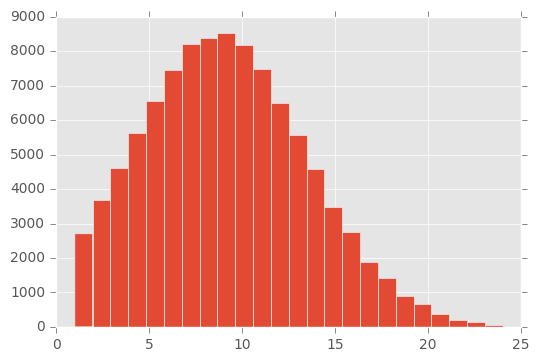

In [20]:
df['hour'].hist(bins=24)
plt.show()

In [21]:
df['weekday'].unique()

array(['Sunday', 'Wednesday', 'Monday', 'Saturday', 'Friday', 'Tuesday',
       'Thursday'], dtype=object)

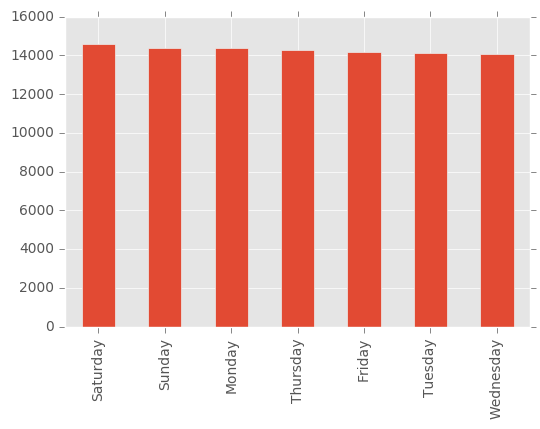

In [22]:
df['weekday'].value_counts().plot.bar()
plt.show()

In [23]:
df['user_country'].value_counts()

US    60099
UK    19939
FR     9995
ES     9967
Name: user_country, dtype: int64

In [24]:
df['user_past_purchases'].value_counts()

0     13877
1     13751
2     13036
3     12077
4     10743
5      9042
6      7518
7      6051
8      4393
9      3296
10     2363
11     1553
12      944
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
Name: user_past_purchases, dtype: int64

In [25]:
len(df['email_id'].unique())

100000

In [26]:
mask = np.logical_not(df.isin(df[(df['email_opened'] == 0) & (df['link_clicked'] == 1)]))
df[mask].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
email_id               99950 non-null float64
email_text             99950 non-null object
email_version          99950 non-null object
hour                   99950 non-null float64
weekday                99950 non-null object
user_country           99950 non-null object
user_past_purchases    99950 non-null float64
email_opened           99950 non-null float64
link_clicked           99950 non-null float64
dtypes: float64(5), object(4)
memory usage: 7.6+ MB


In [27]:
df_clean = df[mask].dropna().copy()

In [28]:
def segment_purchase(row):
    '''
    seperate the user purchased record into 5 categories:
    0: no purchase
    1: 1-5
    2: 6-10
    3: 11-15
    4: more than 15
    '''
    if row == 0:
        return '0: no purchase'
    elif row >= 1 and row <= 5:
        return '1: 1-5'
    elif row >= 6 and row <= 10:
        return '2: 6-10'
    elif row >= 11 and row <= 15:
        return '3: 11-15'
    else:
        return '4: more than 15'
df_clean['purchase_category'] = df_clean['user_past_purchases'].apply(segment_purchase)

In [29]:
def combine_email_cat(row):
    '''
    make combination of email text length and email version
    '''
    return row['email_version'] + '_' + row['email_text']
df_clean['email_cat'] = df_clean.apply(combine_email_cat, axis=1)

In [30]:
week_dict = {'Sunday': '7 Sunday', 'Wednesday': '3 Wednesday', 'Monday': '1 Monday',
             'Saturday': '6 Saturday', 'Friday': '5 Friday', 'Tuesday': '2 Tuesday',
             'Thursday': '4 Thursday'}
def transfer_weekday(row):
    '''
    add num to weekday, make it easier to sort in sequence
    '''
    return week_dict[row]
df_clean['weekday'] = df_clean['weekday'].apply(transfer_weekday)
    

In [31]:
gp = df.groupby('email_text')[['email_opened', 'link_clicked']]

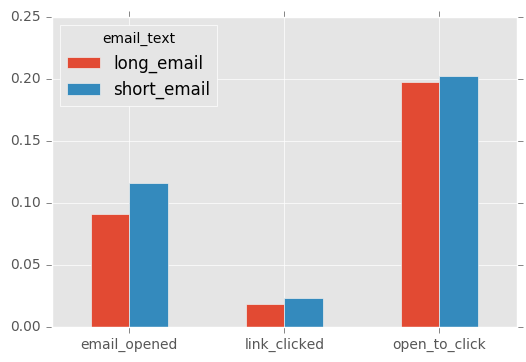

In [32]:
def plot_cat(col, df):
    gp = df.groupby(col)[['email_opened', 'link_clicked']]
    df1 = (gp.sum() / gp.count()).reset_index()
    df2 = gp.sum().reset_index()
    df1['open_to_click'] = df2['link_clicked'] / df2['email_opened']
    df1.index = df1[col]
    df1.drop(col, axis=1).transpose().plot.bar()
    plt.xticks(rotation=0)
    plt.show()
plot_cat('email_text', df_clean)

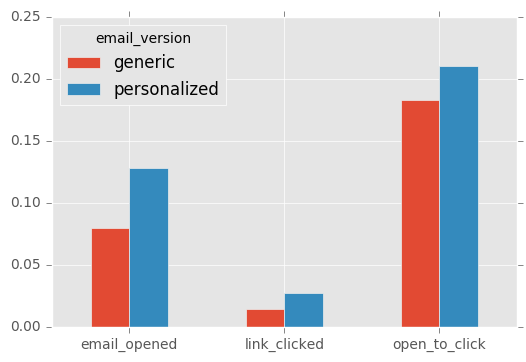

In [33]:
plot_cat('email_version', df_clean)

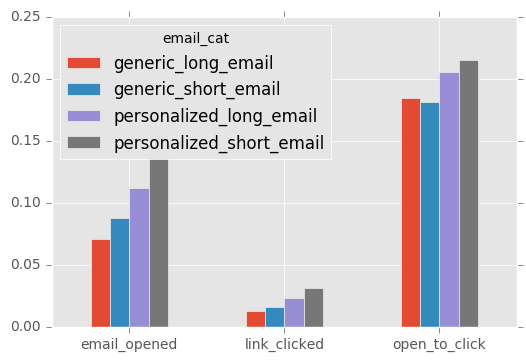

In [34]:
plot_cat('email_cat', df_clean)

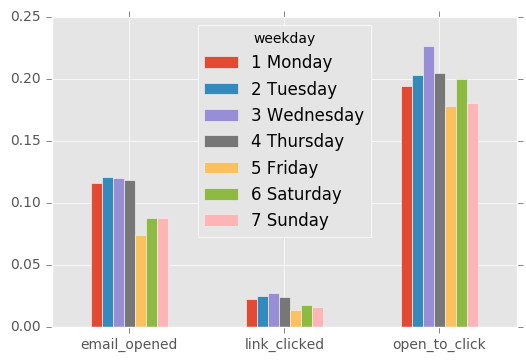

In [35]:
plot_cat('weekday', df_clean)

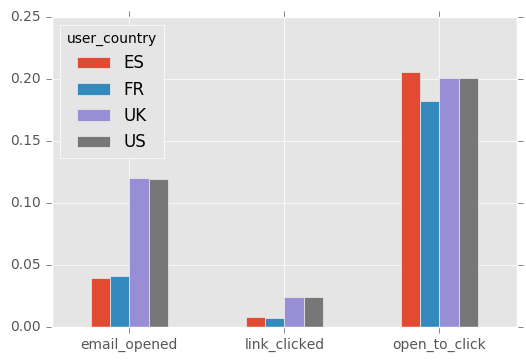

In [36]:
plot_cat('user_country', df_clean)

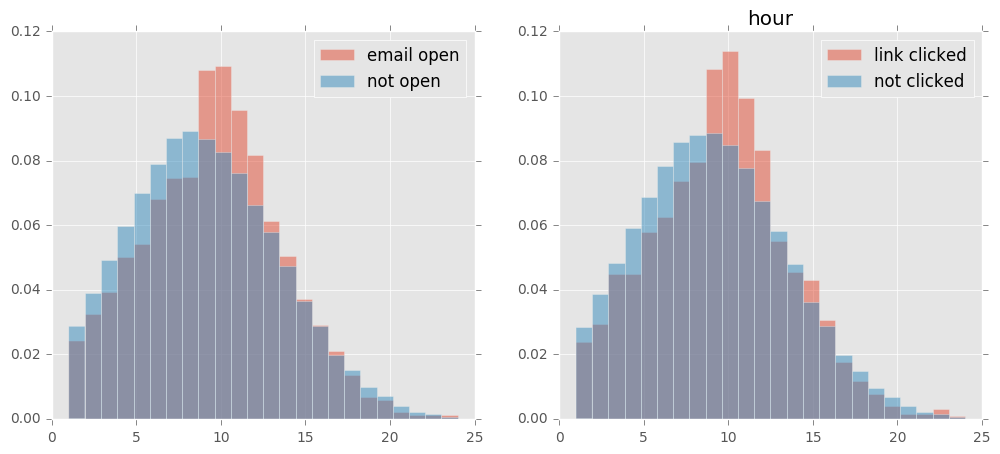

In [37]:
def plot_num(col, df, num):
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    df[col][df['email_opened']==1].hist(bins=num, normed=1, alpha=0.5, label='email open', ax=axes[0])
    df[col][df['email_opened']==0].hist(bins=num, normed=1, alpha=0.5, label='not open', ax=axes[0])
    axes[0].legend()
    df[col][df['link_clicked']==1].hist(bins=num, normed=1, alpha=0.5, label='link clicked', ax=axes[1])
    df[col][df['link_clicked']==0].hist(bins=num, normed=1, alpha=0.5, label='not clicked', ax=axes[1])
    axes[1].legend()
    plt.title(col)
    plt.show()
plot_num('hour', df_clean, 24)

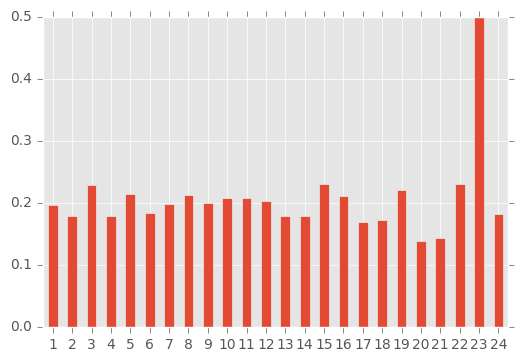

In [38]:
col = 'hour'
df2 = df_clean.groupby(col)[['email_opened', 'link_clicked']].sum().reset_index()
(df2['link_clicked'] / df2['email_opened']).plot.bar()
plt.xticks(range(24), range(1, 25), rotation=0)
plt.show()

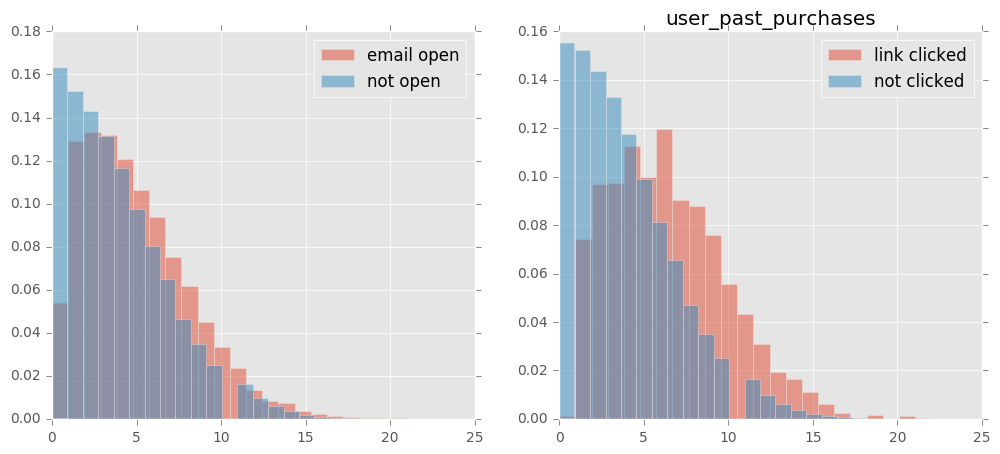

In [39]:
plot_num('user_past_purchases', df_clean, 23)

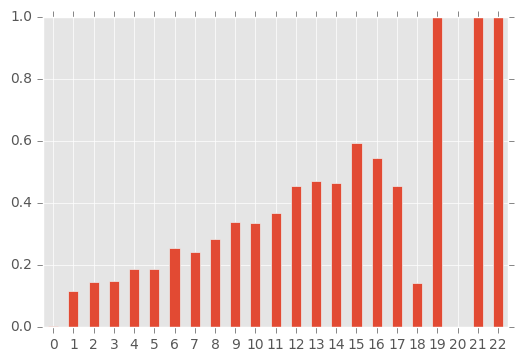

In [40]:
col = 'user_past_purchases'
df2 = df_clean.groupby(col)[['email_opened', 'link_clicked']].sum().reset_index()
(df2['link_clicked'] / df2['email_opened']).plot.bar()
plt.xticks(range(23), range(0, 23), rotation=0)
plt.show()

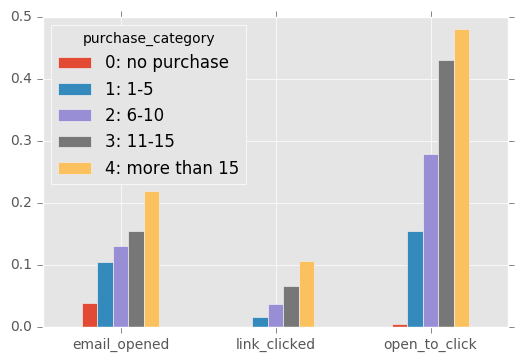

In [41]:
plot_cat('purchase_category', df_clean)

In [42]:
df_clean[(df_clean['user_past_purchases']==0)&(df_clean['link_clicked']==1)]

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,purchase_category,email_cat
34436,189737.0,short_email,personalized,10.0,5 Friday,US,0.0,1.0,1.0,0: no purchase,personalized_short_email
67064,831382.0,short_email,personalized,13.0,2 Tuesday,US,0.0,1.0,1.0,0: no purchase,personalized_short_email


In [43]:
cols_cat = ['email_text', 'email_version', 'email_cat', 'weekday', 'purchase_category']
cols_num = ['hour', 'user_past_purchases']

In [44]:
countries = df['user_country'].unique()

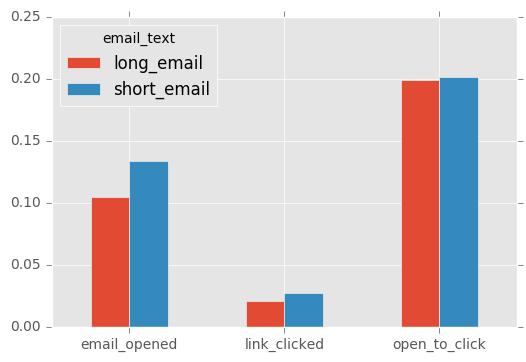

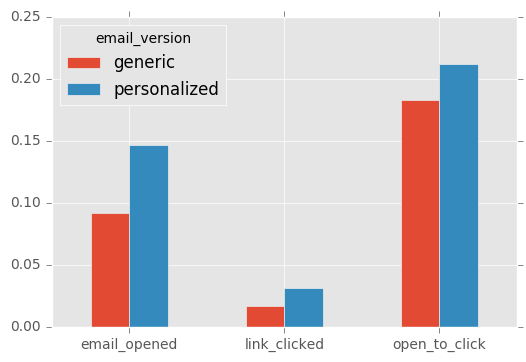

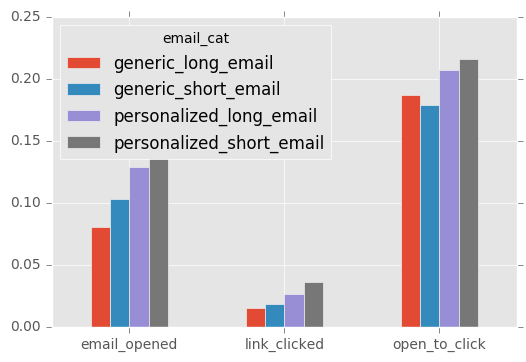

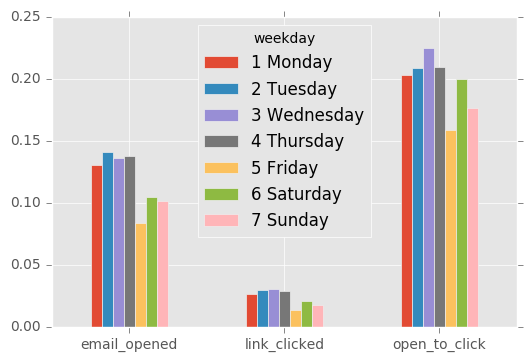

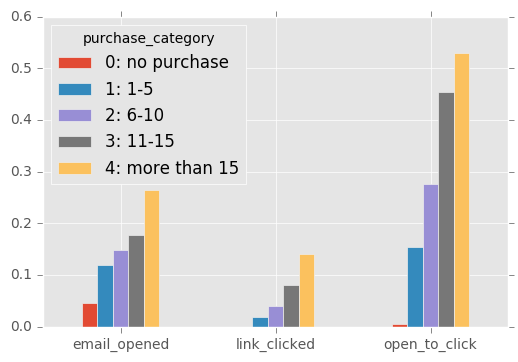

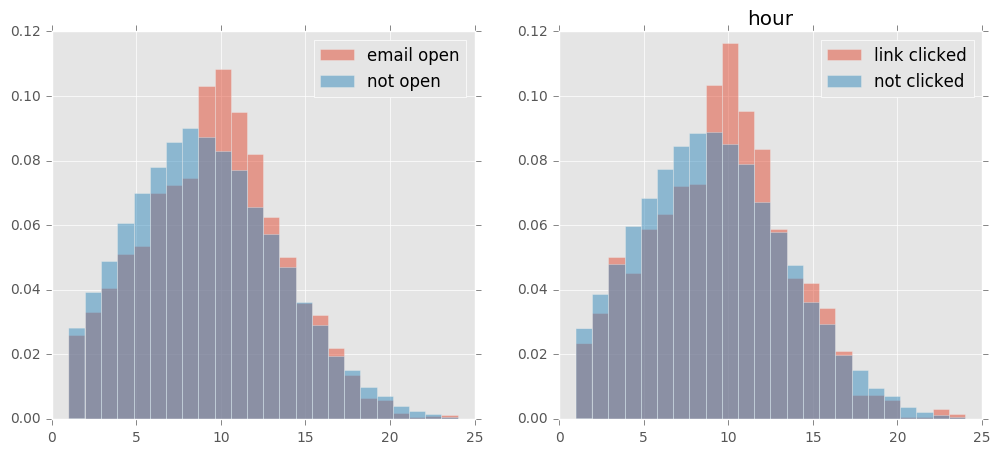

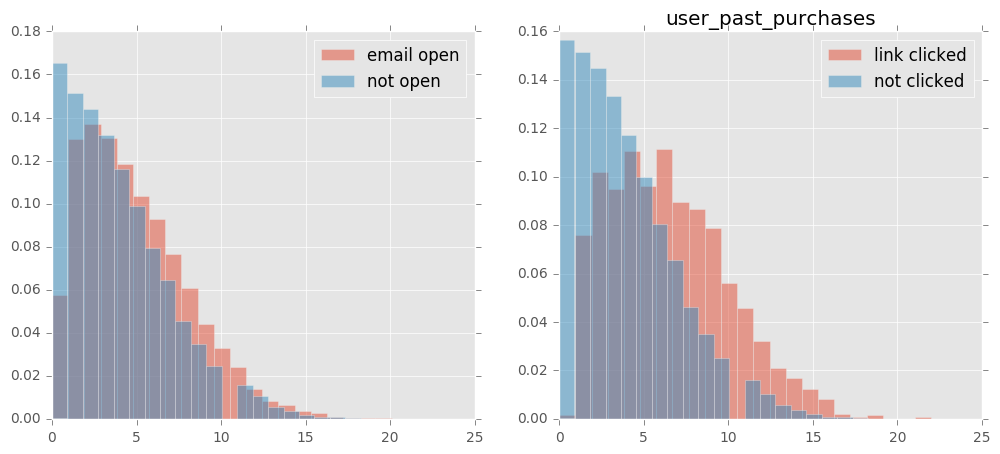

In [45]:
df_us = df_clean[df_clean['user_country'] == 'US']
for cat in cols_cat:
    plot_cat(cat, df_us)
for col in cols_num:
    plot_num(col, df_us, len(df[col].unique()))

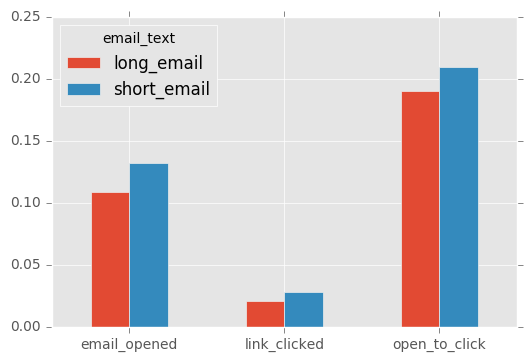

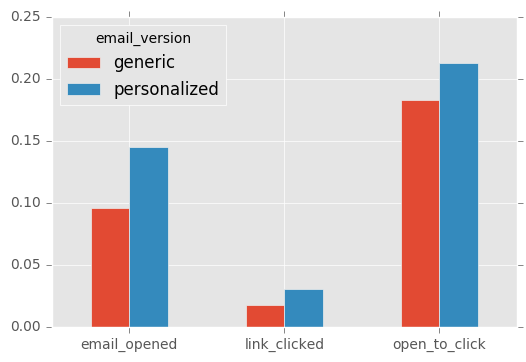

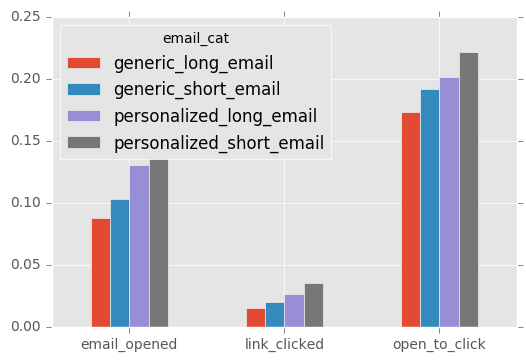

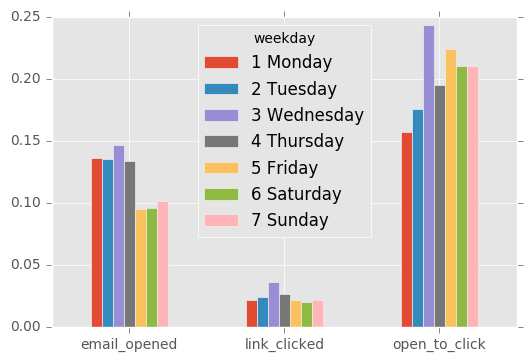

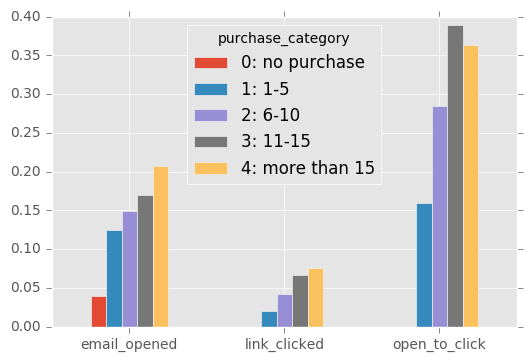

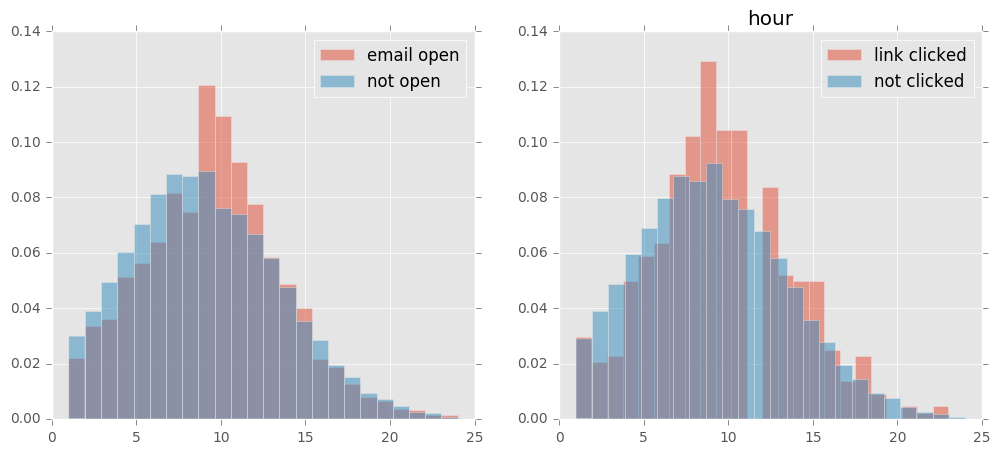

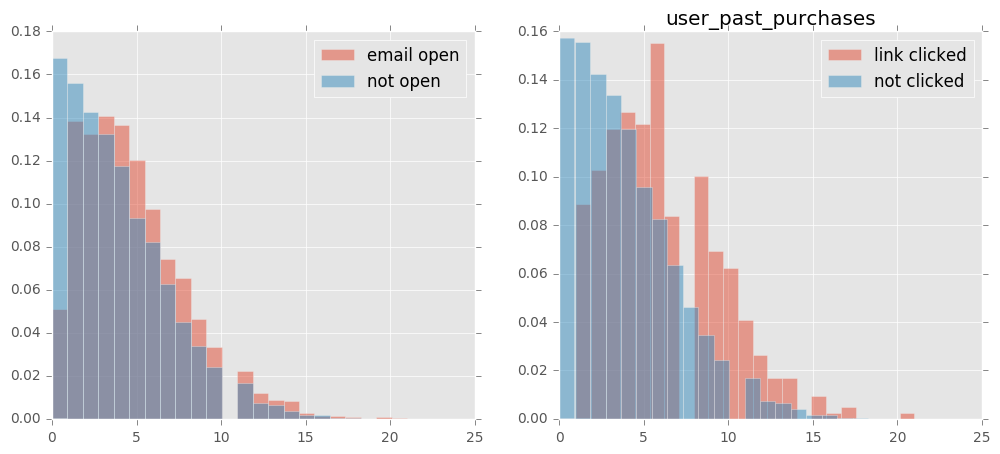

In [46]:
df_uk = df_clean[df_clean['user_country'] == 'UK']
for cat in cols_cat:
    plot_cat(cat, df_uk)
for col in cols_num:
    plot_num(col, df_uk, len(df[col].unique()))

In [47]:
countries

array(['US', 'UK', 'FR', 'ES'], dtype=object)

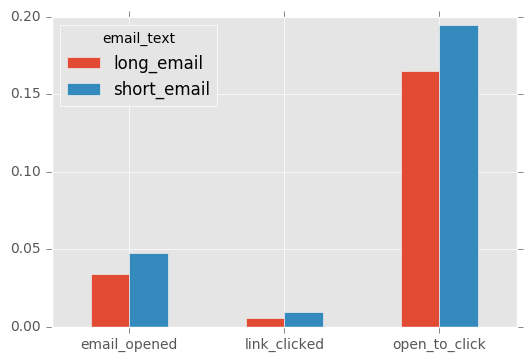

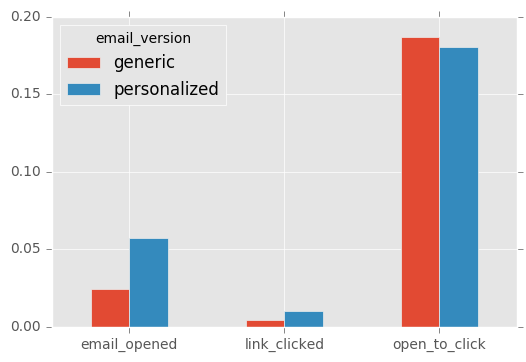

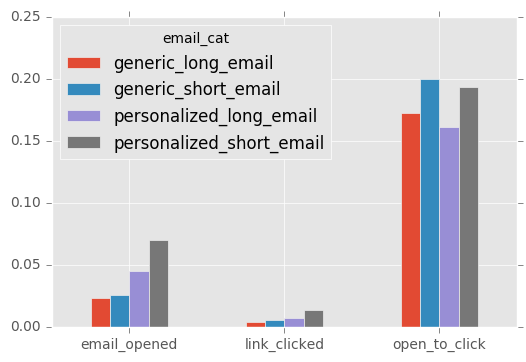

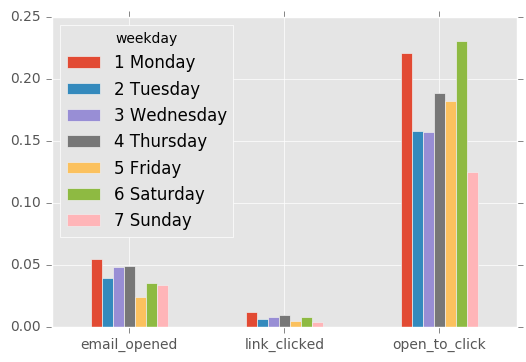

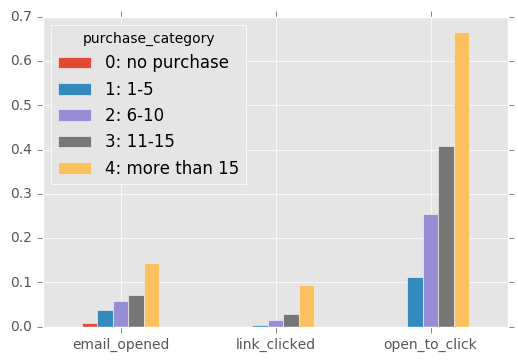

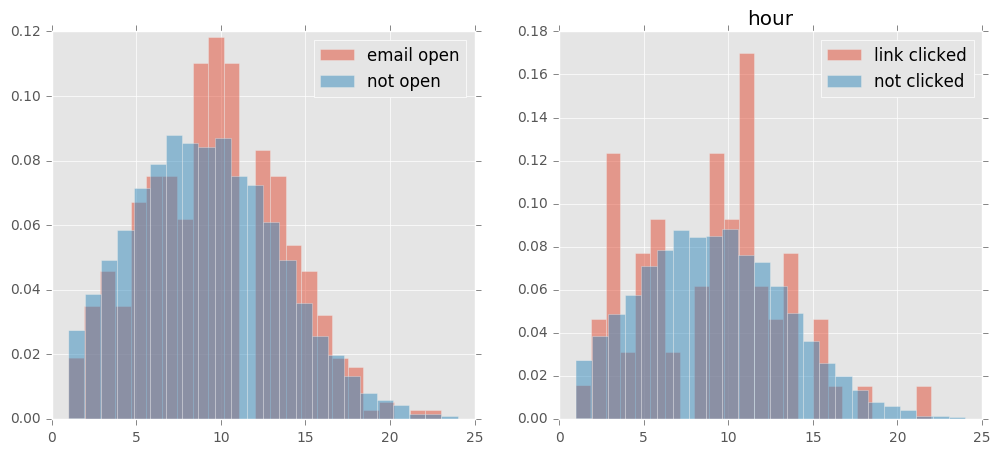

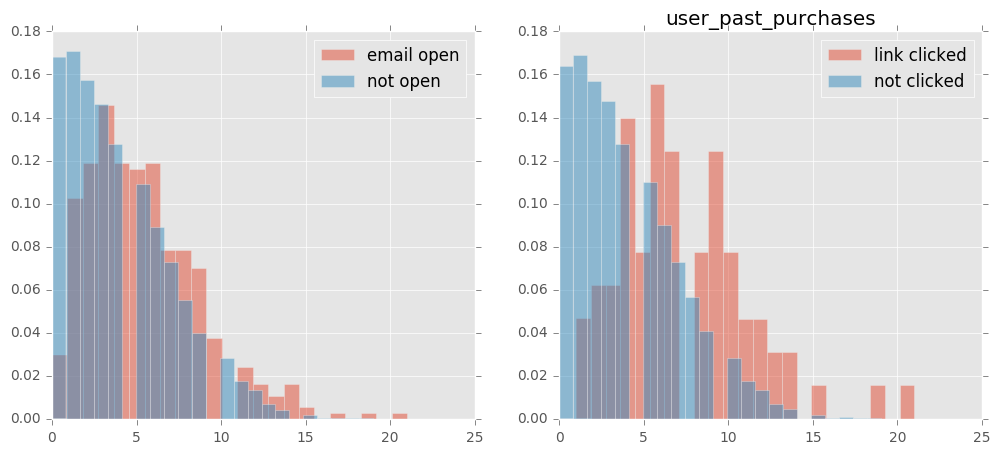

In [48]:
df_fr = df_clean[df_clean['user_country'] == 'FR']
for cat in cols_cat:
    plot_cat(cat, df_fr)
for col in cols_num:
    plot_num(col, df_fr, len(df[col].unique()))

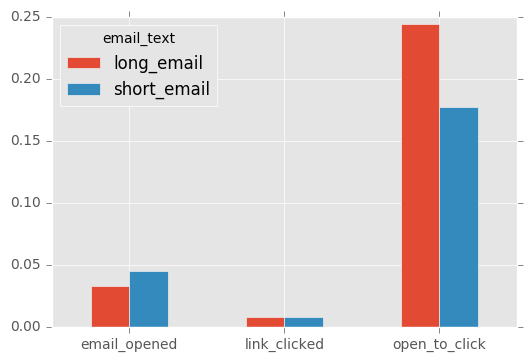

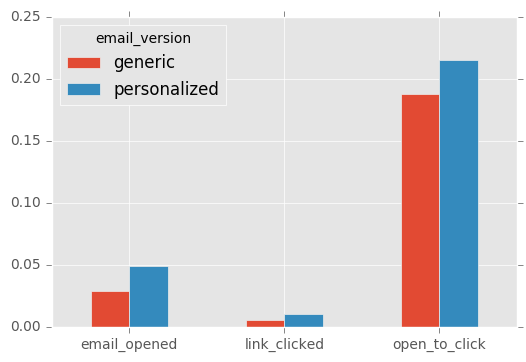

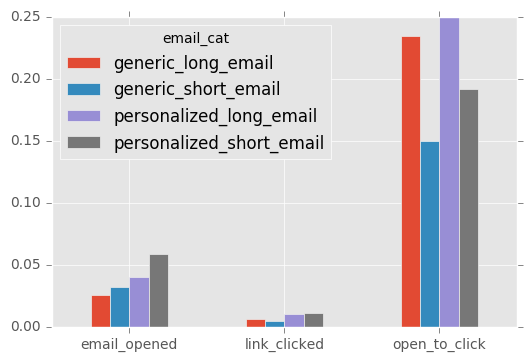

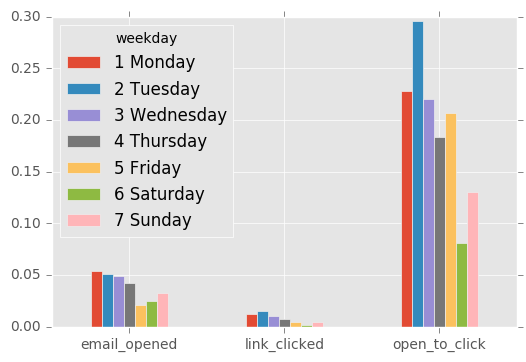

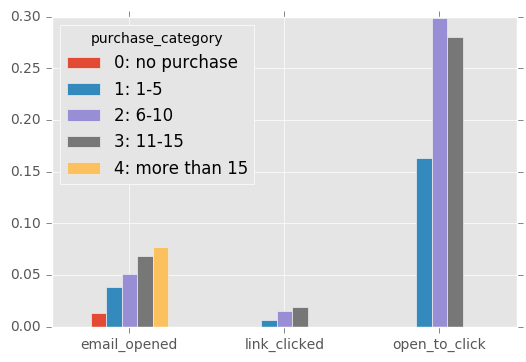

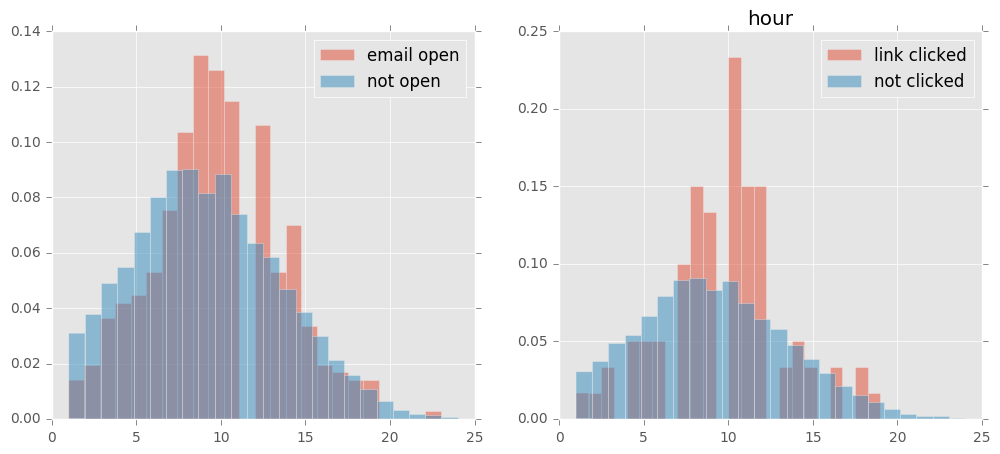

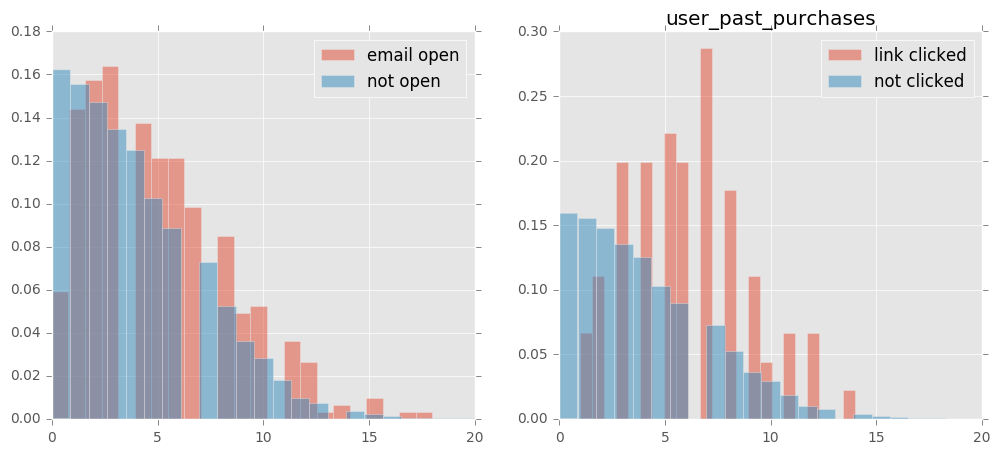

In [49]:
df_es = df_clean[df_clean['user_country'] == 'ES']
for cat in cols_cat:
    plot_cat(cat, df_es)
for col in cols_num:
    plot_num(col, df_es, len(df[col].unique()))

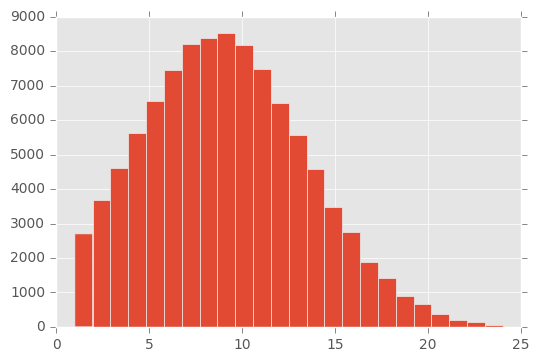

In [50]:
df_clean['hour'].hist(bins=24)
plt.show()

In [51]:
(df_clean[['email_opened', 'link_clicked']].sum() / 99950) *100

email_opened    10.350175
link_clicked     2.070035
dtype: float64

In [52]:
print df_clean['link_clicked'].sum()
print df_clean['email_opened'].sum()
(df_clean['link_clicked'].sum() * 1.0 / df_clean['email_opened'].sum()) *100

2069.0
10345.0


20.0

In [54]:
import scipy.stats as sps

In [55]:
a = sps.norm(12, 4)
b = sps.norm(23, 3)
x = range(1, 30)
p = 2* a.pdf(x) + b.pdf(x)
p = list(p[23:28]) + list(p[4: 23])
p = np.array(p) / sum(p)

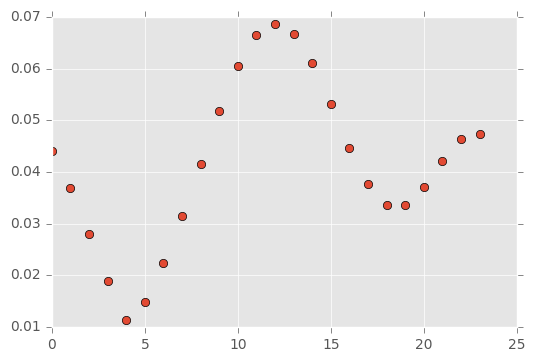

In [56]:
plt.plot(p, 'o')

In [57]:
df_clean.columns

Index([u'email_id', u'email_text', u'email_version', u'hour', u'weekday',
       u'user_country', u'user_past_purchases', u'email_opened',
       u'link_clicked', u'purchase_category', u'email_cat'],
      dtype='object')

In [58]:
df_clean['weekday'] = df_clean['weekday'].apply(lambda x: int(x.split()[0]))

In [59]:
df_clean['email_text'] = df_clean['email_text'].apply(lambda x: 1 if x=='short_email' else 0)

In [60]:
df_clean['email_version'] = df_clean['email_version'].apply(lambda x: 1 if x=='personalized' else 0)

In [61]:
df_clean['purchase_category'] = df_clean['purchase_category'].apply(lambda x: int(x.split(':')[0]))

In [62]:
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['user_country'])], axis=1)
country_dict = {'US': 0, 'UK': 1, 'ES': 2, 'FR': 3}
df_clean['user_country'] = df_clean['user_country'].apply(lambda x: country_dict[x])

In [63]:
email_dict = {'generic_long_email': 0, 'generic_short_email':1,
              'personalized_long_email': 2, 'personalized_short_email':3}
df_clean['email_cat'].unique()
df_clean['email_cat'] = df_clean['email_cat'].apply(lambda x: email_dict[x])

In [64]:
df_clean.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_opened,link_clicked,purchase_category,email_cat,ES,FR,UK,US
0,85120.0,1,1,2.0,7,0,5.0,0.0,0.0,1,3,0,0,0,1
1,966622.0,0,1,12.0,7,1,2.0,1.0,1.0,1,2,0,0,1,0
2,777221.0,0,1,11.0,3,0,2.0,0.0,0.0,1,2,0,0,0,1
3,493711.0,1,0,6.0,1,1,1.0,0.0,0.0,1,1,0,0,1,0
4,106887.0,0,0,14.0,1,0,6.0,0.0,0.0,2,0,0,0,0,1


In [107]:
# cols_cat = ['email_text', 'email_version', 'weekday', 'user_past_purchases', 'hour', 'FR', 'UK', 'US']
# cols_cat = ['weekday', 'user_past_purchases', 'hour', 'user_country', 'email_cat']
cols_cat = ['email_text', 'email_version', 'weekday', 'user_past_purchases', 'hour', 'user_country']

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [108]:
X = df_clean[df_clean['email_opened']==1][cols_cat].values
y = df_clean[df_clean['email_opened']==1]['link_clicked'].values
X = df_clean[cols_cat].values
y = df_clean['email_opened'].values
# X = df_clean[(df_clean['email_opened']==1) & (df_clean['user_country'] == 1)][cols_cat].values
# y = df_clean[(df_clean['email_opened']==1) & (df_clean['user_country'] == 1)]['link_clicked'].values
# X = df_clean[cols_cat].values
# y = df_clean['link_clicked'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
kf = KFold(n_splits=5)
for train_idx, cross_idx in kf.split(X_train):
    X_t, y_t = X_train[train_idx], y_train[train_idx]
    X_c, y_c = X_train[cross_idx], y_train[cross_idx]
    rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
    rf.fit(X_t, y_t)
    y_p = rf.predict(X_c)
    acc = accuracy_score(y_c, y_p)
    pre = precision_score(y_c, y_p)
    rec = recall_score(y_c, y_p)
    print y_p.sum(), y_c.sum(), len(y_c)
    print acc, pre, rec

174.0 270.0 1449
0.76397515528 0.293103448276 0.188888888889
155.0 296.0 1448
0.745165745856 0.264516129032 0.138513513514
167.0 273.0 1448
0.761049723757 0.281437125749 0.172161172161
185.0 297.0 1448
0.729281767956 0.243243243243 0.151515151515
168.0 293.0 1448
0.734116022099 0.22619047619 0.129692832765


In [109]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print y_pred.sum(), y_test.sum(), len(y_test)
print acc, pre, rec

115.0 620.0 3104
0.797358247423 0.460869565217 0.0854838709677


In [128]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print y_pred.sum(), y_test.sum(), len(y_test)
print acc, pre, rec

331.0 620.0 3104
0.757409793814 0.299093655589 0.159677419355


In [73]:
rf.feature_importances_

array([ 0.03920118,  0.02356019,  0.15878293,  0.28920709,  0.4166683 ,
        0.07258031])

In [130]:
def hour_prob():
    a = sps.norm(12, 4)
    b = sps.norm(23, 3)
    x = range(1, 30)
    p = 3* a.pdf(x) + b.pdf(x)
    p = list(p[23:28]) + list(p[4: 23])
    p = np.array(p) / sum(p)
    return p


def generate_sim_data(size=20000):
    email_text = np.random.binomial(1, 1, size)
    email_ver = np.random.binomial(1, 1, size)
    p_hour = hour_prob()
    p_purchase = sps.norm(12, 5).pdf(range(0, 23))
    p_purchase = p_purchase / p_purchase.sum()
    p_weekday = sps.norm(3, 4).pdf(range(1, 8))
    p_weekday = p_weekday/p_weekday.sum()
    hour = np.random.choice(range(1, 25), size, p=p_hour)
    purchase = np.random.choice(range(0, 23), size, p=p_purchase)
    weekday = np.random.choice(range(1, 8), size, p=p_weekday)
    country = np.random.choice(range(4), size, p=[0.7, 0.2, 0.05, 0.05])
    return np.stack([email_text, email_ver, weekday, purchase, hour, country]).T


X_sim = generate_sim_data(100000)

In [129]:
y_pred_sim = rf.predict(X_sim)
y_pred_sim.sum() / len(y_pred_sim)

0.31696999999999997

In [115]:
y_pred = rf.predict(X)
y_pred.sum() / len(y_pred)

0.13668438859352344

None
